<a href="https://colab.research.google.com/github/liyachittilappilly/California-Housing-Price-Prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **California Housing Price Prediction**

###  **Data**

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


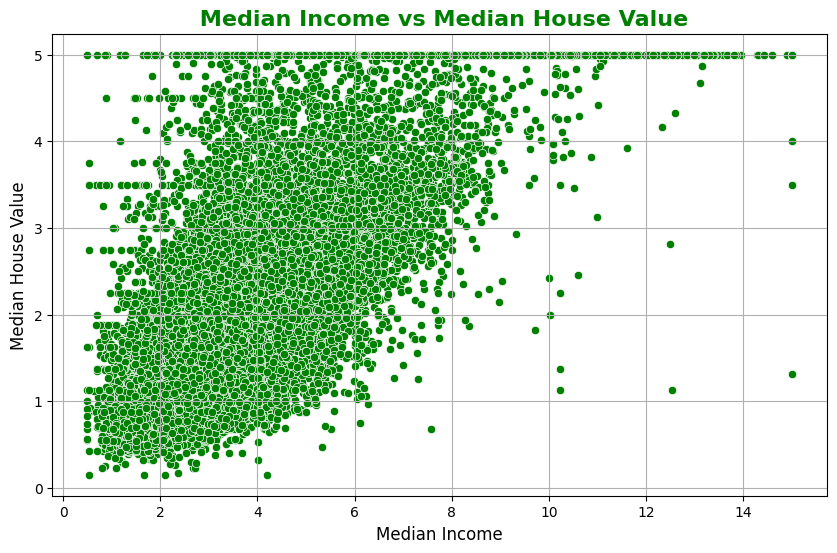

###  **Actual vs Predicted**


-  **Actual Value of the House:** <span style="font-size:22px; font-weight:bold; color:green">$47700.00</span>   



-  **Model Predicted Value:** <span style="font-size:22px; font-weight:bold; color:green">$71912.28</span>


###  **Model Evaluation (RMSE)**

 **Root Mean Squared Error:** <span style='font-size:20px; font-weight:bold; color:green'>0.7456</span>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, Markdown
display(Markdown("##  **California Housing Price Prediction**"))

housing = fetch_california_housing(as_frame=True)
data = housing.frame
X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]

display(Markdown("###  **Data**"))
display(data.head())

plt.figure(figsize=(10,6))
sns.scatterplot(x=data["MedInc"], y=data["MedHouseVal"], color='green')
plt.title(" Median Income vs Median House Value", fontsize=16, fontweight='bold', color='green')
plt.xlabel("Median Income", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)
plt.grid(True)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

actual_val = y_test.values[0]
predicted_val = predictions[0]

display(Markdown("###  **Actual vs Predicted**"))
display(Markdown(f"""
-  **Actual Value of the House:** <span style="font-size:22px; font-weight:bold; color:green">${actual_val * 100000:.2f}</span>
"""))
display(Markdown(f"""
-  **Model Predicted Value:** <span style="font-size:22px; font-weight:bold; color:green">${predicted_val * 100000:.2f}</span>
"""))

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

display(Markdown(f"###  **Model Evaluation (RMSE)**"))
display(Markdown(f" **Root Mean Squared Error:** <span style='font-size:20px; font-weight:bold; color:green'>{rmse:.4f}</span>"))

